### 1 Import Libraries and Data

In [120]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

# import Dataframes with cleaned data independently of the operating system (mac or windows or linux) in a pandas dataframe
charging_data = pd.read_pickle(os.path.join('Data', 'charging_data.pkl'))
weather_data = pd.read_pickle(os.path.join('Data', 'weather_data.pkl'))

In [ ]:
# charging_data.head()

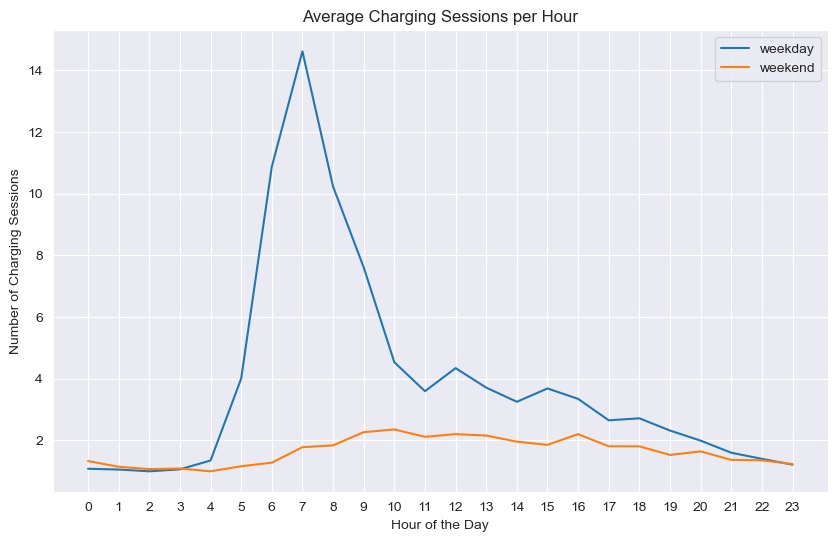

In [148]:
charging_data["day"] = charging_data["connectionTime"].dt.day_name()
charging_data['isWeekend'] = charging_data['day'].isin(['Saturday', 'Sunday'])
charging_data["hour"] = charging_data["connectionTime"].dt.hour
charging_data["date"] = charging_data["connectionTime"].dt.date

# calculate number of charging sessions per day and hour
sessions_per_hour_day_weekend = charging_data[charging_data['isWeekend']].groupby(["date", "hour"]).size().reset_index(
    name="count")
sessions_per_day_weekday = charging_data[~charging_data['isWeekend']].groupby(["date", "hour"]).size().reset_index(
    name="count")
# print(sessions_per_hour_day_weekend.head())

# calculate average number of charging sessions per hour
average_sessions_per_hour_weekend = sessions_per_hour_day_weekend.groupby("hour")["count"].mean()
average_sessions_per_weekday = sessions_per_day_weekday.groupby("hour")["count"].mean()

plt.figure(figsize=(10, 6))
average_sessions_per_weekday.plot(kind="line", label="weekday")
average_sessions_per_hour_weekend.plot(kind="line", label="weekend")
plt.title("Average Charging Sessions per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Charging Sessions")
plt.xticks(range(0, 24))
plt.legend(loc=0)
plt.grid(True)
plt.show()

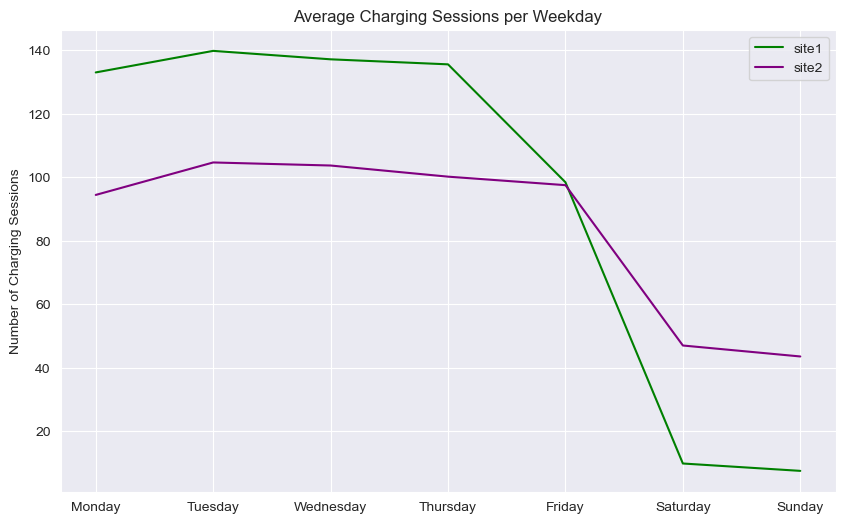

In [147]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
charging_data['day'] = pd.Categorical(charging_data['day'], categories=weekday_order, ordered=True)
charging_data['week'] = charging_data["connectionTime"].dt.isocalendar().week

# calculate number of charging sessions per week and day
sessions_per_week_weekday_site1 = charging_data[charging_data['siteID'] == '1'].groupby(['week', 'day'],
                                                                                        observed=False).size()
sessions_per_week_weekday_site2 = charging_data[charging_data['siteID'] == '2'].groupby(['week', 'day'],
                                                                                        observed=False).size()
# print(sessions_per_day_weekday_site1.head())

# calculate average number of charging sessions per weekday
average_sessions_per_weekday_site1 = sessions_per_week_weekday_site1.groupby('day', observed=False).mean()
average_sessions_per_weekday_site2 = sessions_per_week_weekday_site2.groupby('day', observed=False).mean()

plt.figure(figsize=(10, 6))
average_sessions_per_weekday_site1.plot(kind='line', label='site1', color='green')
average_sessions_per_weekday_site2.plot(kind='line', label='site2', color='purple')
plt.title('Average Charging Sessions per Weekday')
plt.xlabel(None)
plt.ylabel('Number of Charging Sessions')
plt.legend(loc=0)
plt.grid(True)
plt.show()

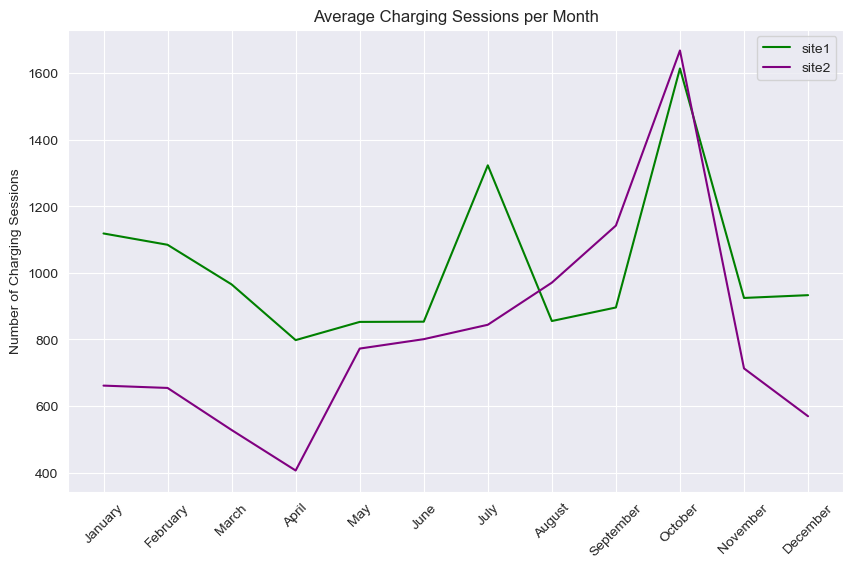

In [146]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
                'November', 'December']
charging_data['month'] = pd.Categorical(charging_data['connectionTime'].dt.month_name(), categories=months_order,
                                        ordered=True)
charging_data['year'] = charging_data['connectionTime'].dt.year

# calculate number of charging sessions per day and day of the week
sessions_per_year_month_site1 = charging_data[charging_data['siteID'] == '1'].groupby(['year', 'month'],
                                                                                      observed=True).size()
sessions_per_year_month_site2 = charging_data[charging_data['siteID'] == '2'].groupby(['year', 'month'],
                                                                                      observed=True).size()
# print(sessions_per_year_month_site1)

# calculate average number of charging sessions per day of the week
average_sessions_per_month_site1 = sessions_per_year_month_site1.groupby('month', observed=False).mean()
average_sessions_per_month_site2 = sessions_per_year_month_site2.groupby('month', observed=False).mean()

plt.figure(figsize=(10, 6))
average_sessions_per_month_site1.plot(kind='line', label='site1', color='green')
average_sessions_per_month_site2.plot(kind='line', label='site2', color='purple')
plt.title('Average Charging Sessions per Month')
plt.xlabel(None)
plt.ylabel('Number of Charging Sessions')
plt.legend(loc=0)
plt.xticks(range(0, 12), months_order, rotation=45)
plt.grid(True)
plt.show()